### Task 3

### Car Price Prediction with Machine Learning

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
df=pd.read_csv('./car data.csv')

In [40]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [43]:
df.shape

(301, 9)

In [44]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [45]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [46]:
df.shape

(301, 9)

In [47]:
df.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


In [48]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

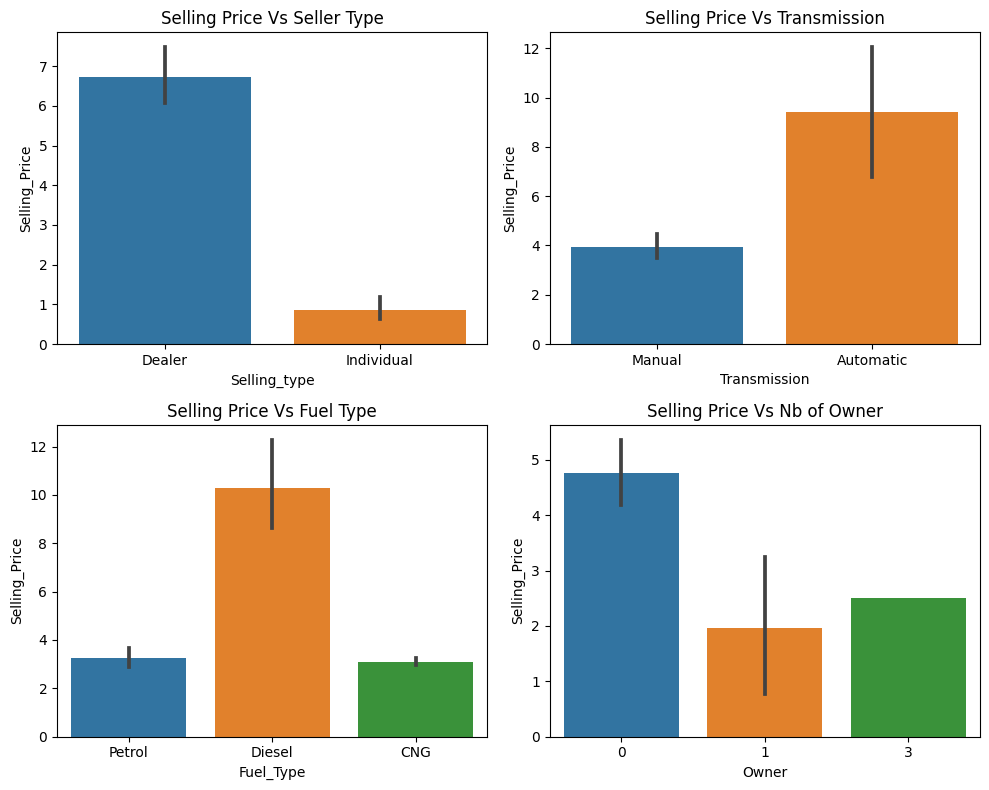

In [49]:
# Seller Type, Transmission and Fuel Type Visualization with target variable
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.barplot(data=df,x='Selling_type',y='Selling_Price')
plt.title('Selling Price Vs Seller Type')

plt.subplot(2,2,2)
sns.barplot(data=df,x='Transmission',y='Selling_Price')
plt.title('Selling Price Vs Transmission')

plt.subplot(2,2,3)
sns.barplot(data=df,x='Fuel_Type',y='Selling_Price')
plt.title('Selling Price Vs Fuel Type')

plt.subplot(2,2,4)
sns.barplot(data=df,x='Owner',y='Selling_Price')
plt.title('Selling Price Vs Nb of Owner')
plt.tight_layout()
plt.show()

In [50]:
numerical=[ 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms','Owner']
categorical=['Car_Name','Fuel_Type', 'Selling_type', 'Transmission', ]

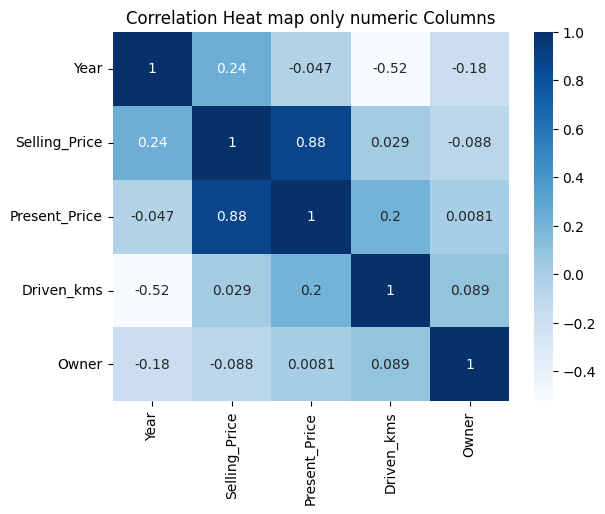

In [51]:
sns.heatmap(df[numerical].corr(),annot=True,cmap="Blues")
plt.title("Correlation Heat map only numeric Columns")
plt.show()

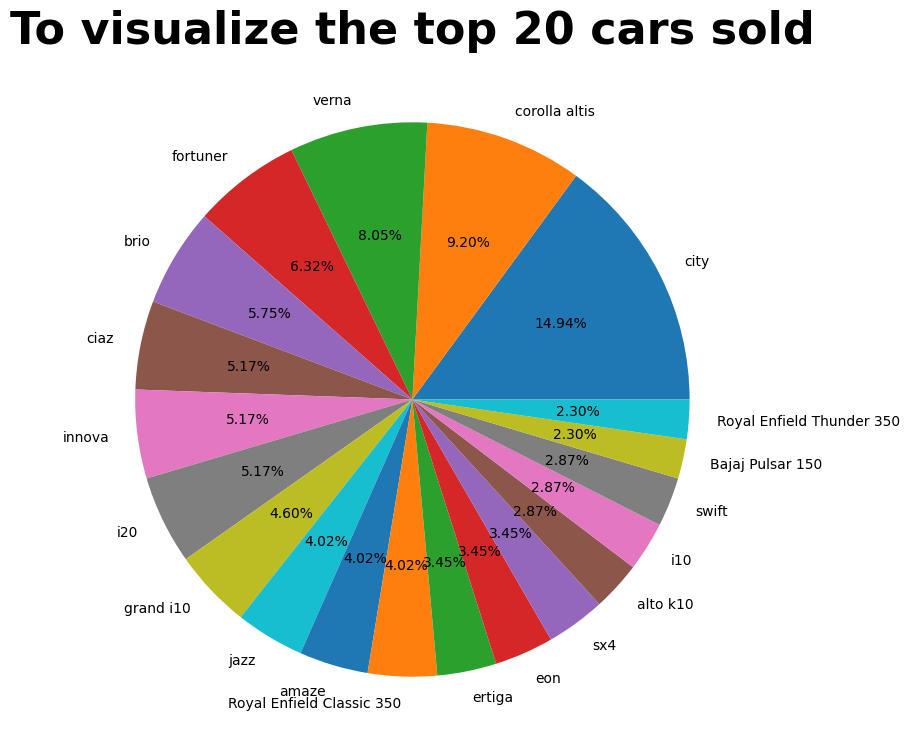

In [52]:
#Let's visualize the car names in the dataset
car_names=df['Car_Name'].value_counts()
top_20_cars = car_names[:20]
plt.figure(figsize=(16,9))
plt.pie(top_20_cars,labels=top_20_cars.index, autopct='%1.2f%%')
plt.title("To visualize the top 20 cars sold",fontsize=32,fontweight='bold')
plt.show()

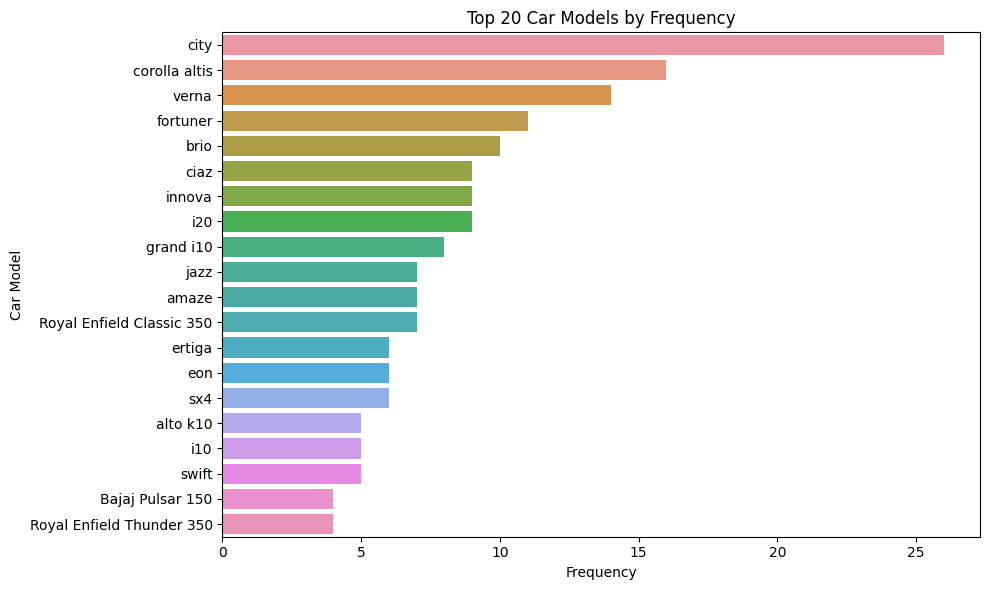

In [53]:
n = 20  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

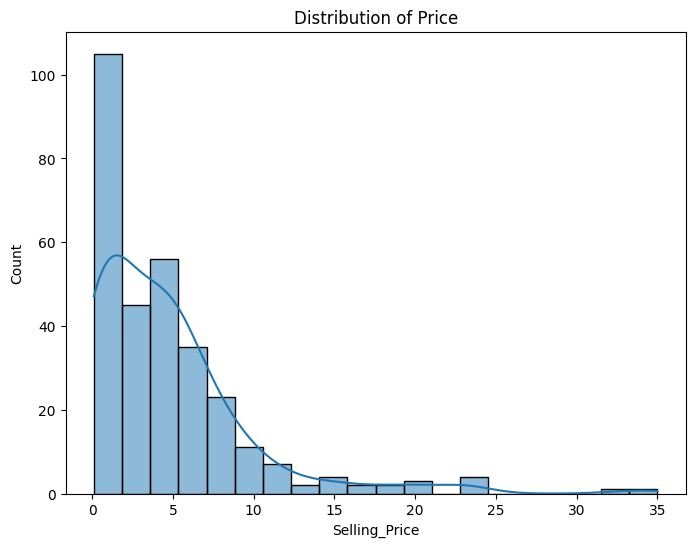

In [54]:


# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['Selling_Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()



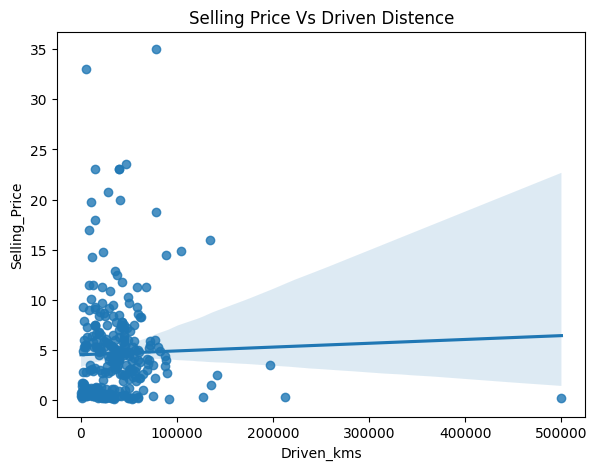

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.regplot(data=df,x='Driven_kms',y='Selling_Price')
plt.title('Selling Price Vs Driven Distence')
plt.show()

In [56]:
fuel_type_mapping = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
selling_type_mapping = {'Dealer': 0, 'Individual': 1}
transmission_mapping = {'Manual': 0, 'Automatic': 1}

df['Fuel_Type'] = df['Fuel_Type'].map(fuel_type_mapping)
df['Selling_type'] = df['Selling_type'].map(selling_type_mapping)
df['Transmission'] = df['Transmission'].map(transmission_mapping)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


/home/surendar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


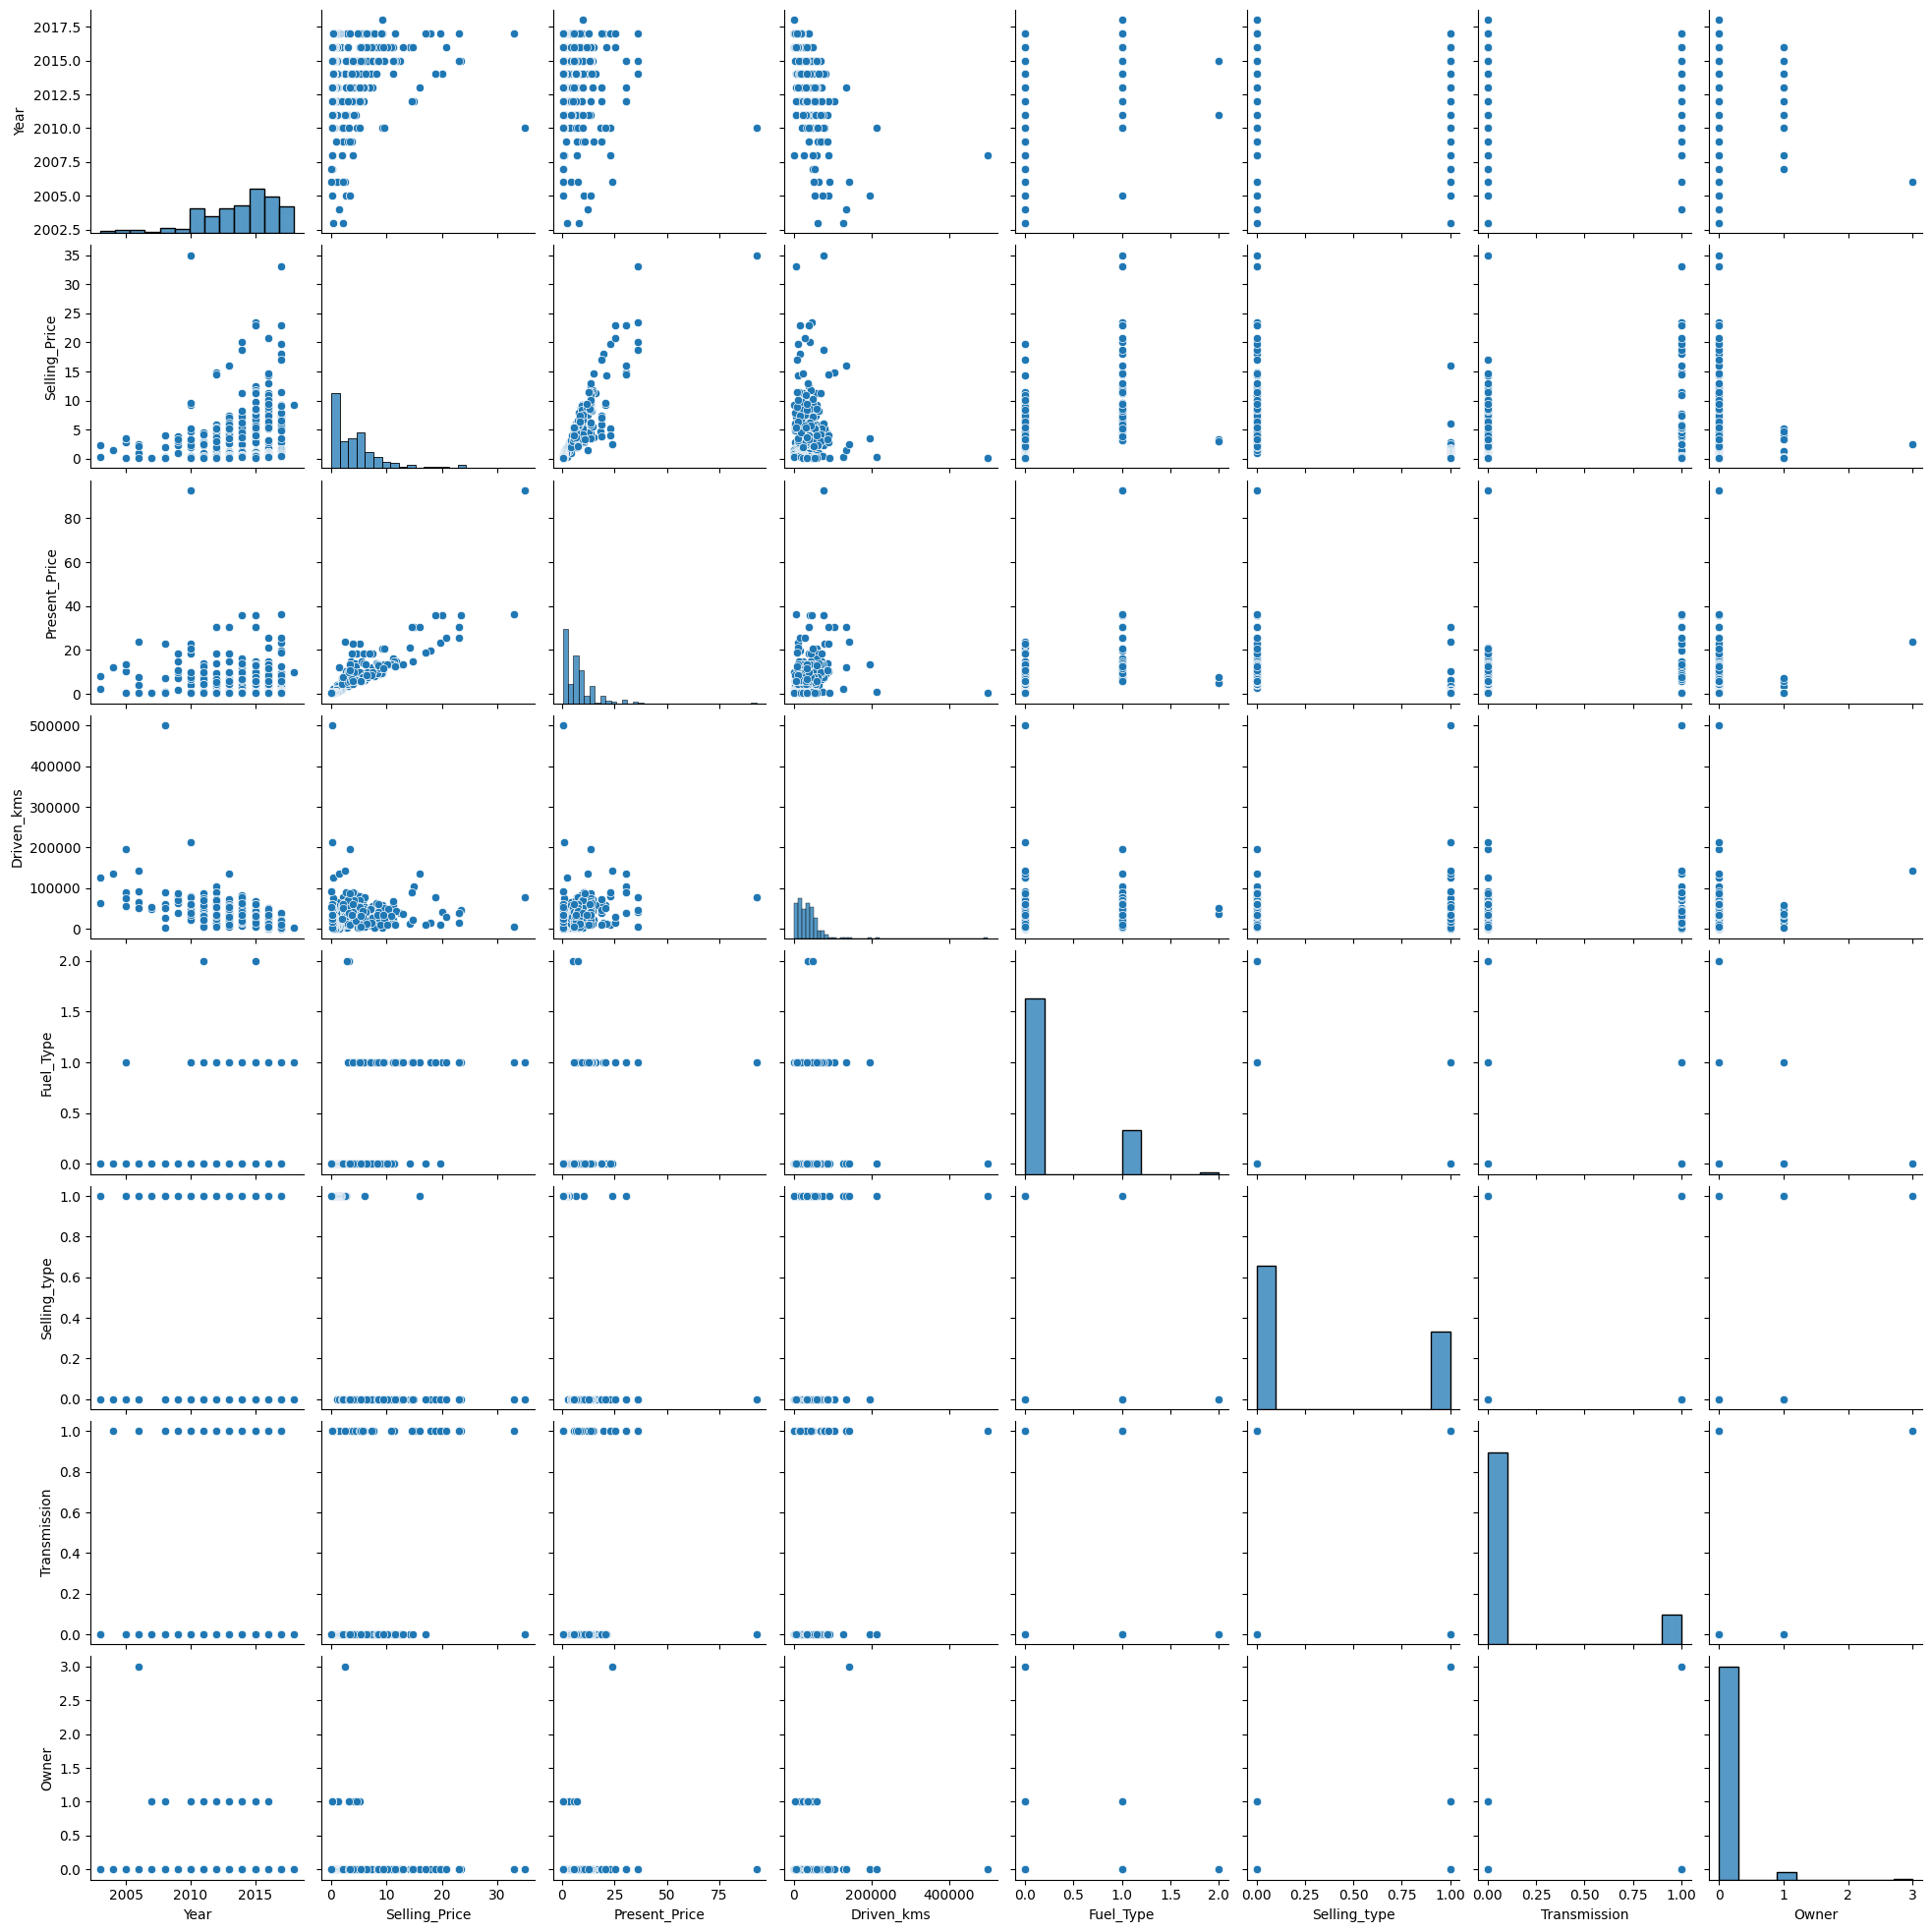

In [57]:
sns.pairplot(df)
plt.show()

### Splitting the dataset into features and target

In [58]:
#splitting the data and target
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

### Splitting  training and testing data

In [59]:
from sklearn.model_selection import train_test_split

In [60]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [61]:
x_train.shape

(270, 7)

### Model Evaluation

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [63]:
lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()


In [64]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    print('Model is: {}'.format(model))
    m = model.fit(X_train, y_train)
    print('Training score : {}'.format(m.score(X_train, y_train)))
    
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))
    
    r2score = r2_score(y_test, prediction)
    print('R2 score is : {}'.format(r2score))
    
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    print('MAE : {}'.format(mae))
    print('MSE : {}'.format(mse))
    print('RMSE : {}'.format(rmse))
    
    model_dict = {'Model Name': str(model), 'R2 score': r2score, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}
    return model_dict

In [65]:
models = [lr, tree, rf, gb, xgb]
res = pd.DataFrame(columns=['Model Name', 'R2 score', 'MAE', 'MSE', 'RMSE'])

for model in models:
    model_results = train_evaluate_model(model, x_train, y_train, x_test, y_test)
    res = pd.concat([res, pd.DataFrame([model_results])], ignore_index=True)
    print('=' * 50)

Model is: LinearRegression()
Training score : 0.8803200808128693
Predictions are : [ 3.11937095  8.25059809  6.09289042 -1.45526057  9.04539467  7.20675142
  1.41527663  0.86892809  1.48896475  7.23683829  9.07390531  0.56319469
  8.41656471  3.64221184  6.59263129  2.88639576  0.41985637 10.87355869
  1.92718222  2.53325829  0.37406557  7.96730748  6.27027007  2.40831112
  0.80809969  3.50319787  5.12819698  2.57587391  2.31862807  1.88328013
  0.37336536]
R2 score is : 0.8310850335970412
MAE : 1.0270857264068236
MSE : 2.5192531413285493
RMSE : 1.5872155308364864
Model is: DecisionTreeRegressor()
Training score : 1.0
Predictions are : [ 0.5  11.25  4.1   0.2   7.05  5.95  1.11  0.6   0.5   7.2   7.25  1.25
  7.2   0.45  4.75  3.25  1.05 19.75  0.48  1.45  0.38  9.1   4.5   2.7
  0.48  3.1   5.25  2.9   1.35  1.15  0.38]
R2 score is : 0.9527060096442053
MAE : 0.53
MSE : 0.7053580645161291
RMSE : 0.8398559784368562
Model is: RandomForestRegressor()
Training score : 0.9888153336535355
Pr

In [66]:
res

,Model Name,R2 score,MAE,MSE,RMSE
0,LinearRegression(),0.831085,1.027086,2.519253,1.587216
1,DecisionTreeRegressor(),0.952706,0.530000,0.705358,0.839856
2,RandomForestRegressor(),0.981582,0.339994,0.274698,0.524117
3,GradientBoostingRegressor(),0.968077,0.362324,0.476114,0.690010
4,"XGBRegressor(base_score=None, booster=None, ca...",0.965541,0.359114,0.513939,0.716896


In [67]:


models = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor']

result = pd.DataFrame({'Models':models})
result['R2 score'] = res['R2 score']
result['MAE'] = res['MAE']
result['MSE'] = res['MSE']
result['RMSE'] = res['RMSE']
result = result.sort_values(by='R2 score',ascending=False)
result



,Models,R2 score,MAE,MSE,RMSE
2,RandomForestRegressor,0.981582,0.339994,0.274698,0.524117
3,GradientBoostingRegressor,0.968077,0.362324,0.476114,0.690010
4,XGBRegressor,0.965541,0.359114,0.513939,0.716896
1,DecisionTreeRegressor,0.952706,0.530000,0.705358,0.839856
0,LinearRegression,0.831085,1.027086,2.519253,1.587216


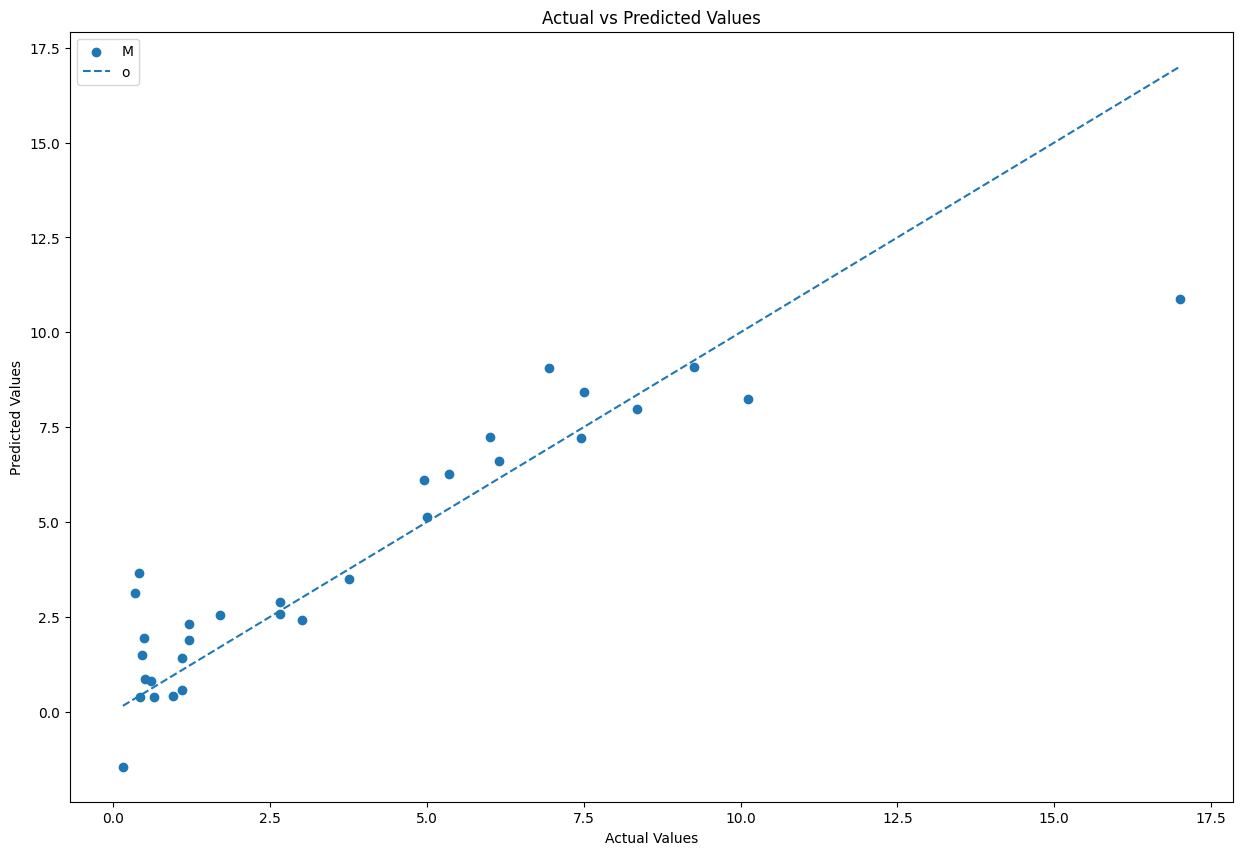

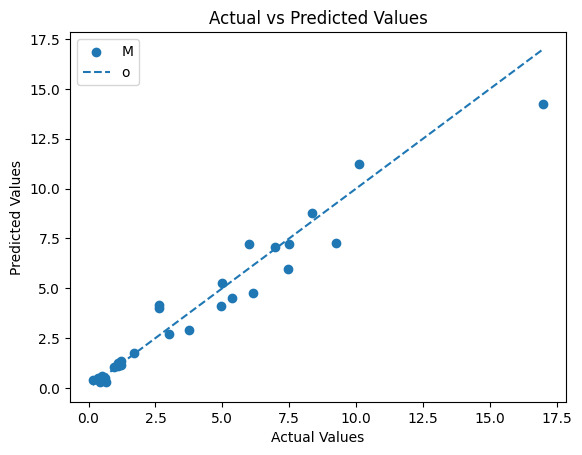

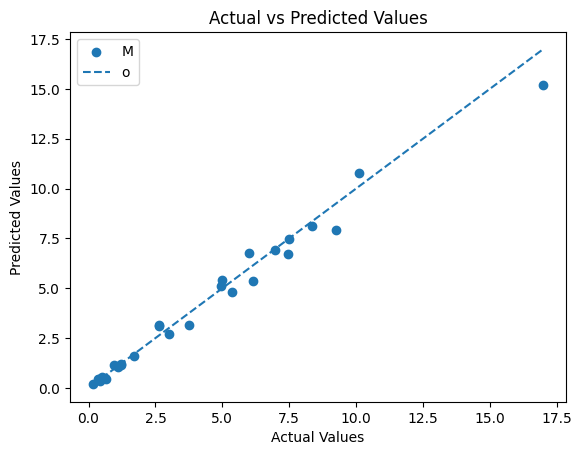

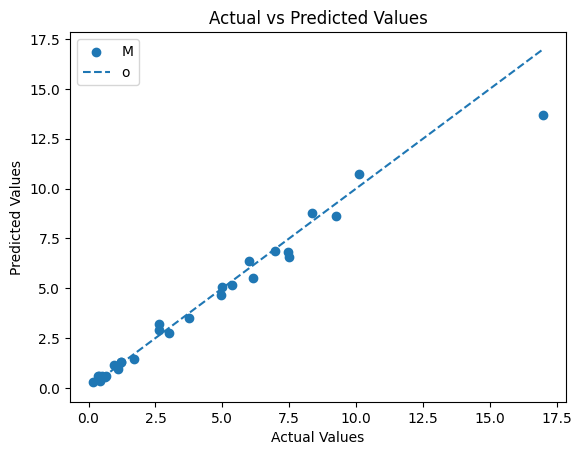

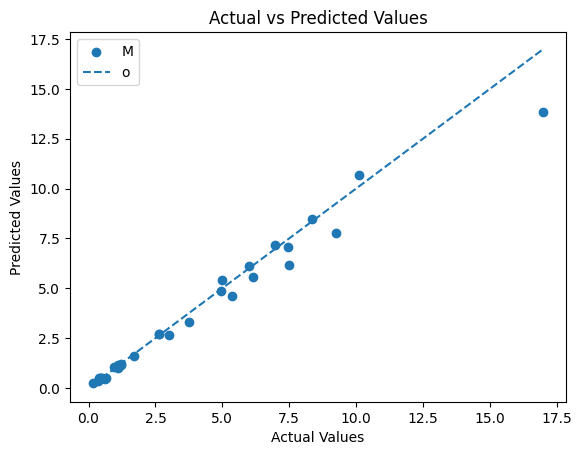

In [68]:
plt.figure(figsize=(15, 10))
models = [lr, tree, rf, gb, xgb]

for model in models:
    m = model.fit(x_train, y_train)
    prediction = m.predict(x_test)
    
    # Scatter plot of actual vs predicted values
    plt.scatter(y_test, prediction, label=str(model))

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', label='Ideal Linear Relationship')

    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend("Models")

    plt.show()

### Conclusions:

  Certainly! Here's a rephrasing of the given points with different wording:

   1. The current price of a car significantly influences the predicted selling price, as an increase in one corresponds to a gradual increase in the other.

   2. Cars fueled by Diesel generally command a higher selling price compared to other fuel types.

   3. Manual transmission cars are typically priced lower, while cars with automatic transmission tend to have higher selling prices.

   4. Cars sold by individual owners tend to fetch lower selling prices compared to those sold by dealerships.
